## Simple TensorFlow Example

In [2]:
''' A simple TensorFlow application '''

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import tensorflow as tf



In [3]:
# Create tensor
msg = tf.string_join(['Hello ', 'TensorFlow'])

with tf.Session() as sess:
        print(sess.run(msg))

b'Hello TensorFlow'


## Basic Operations in TensorFlow

In [4]:
# Step 1: Create two tensors and an addition operation
t1 = tf.constant([1.2, 2.3, 3.4, 4.5])
t2 = tf.random_normal([4])
t3 = t1 + t2
graph1 = tf.get_default_graph()

# Step 2: Create a second graph and make it the default graph
graph2 = tf.Graph()
with graph2.as_default():

# Step 3: Create two tensors in the second graph and a subtraction operation
    t4 = tf.constant([5.6, 6.7, 7.8, 8.9])
    t5 = tf.random_normal([4])
    t6 = t4 - t5


In [5]:
# Step 4: Create a session and execute the addition operation from the first graph
with tf.Session(graph=graph1) as sess:
    print('Addition ', sess.run(t3))

# Step 5: Create a second session and execute the subtraction operation from the second graph
with tf.Session(graph=graph2) as sess:
    print('Subtraction ', sess.run(t6))

Addition  [0.83181566 0.5065607  2.3536372  5.4337854 ]
Subtraction  [6.1861625 6.1775947 6.8279486 6.9665184]


## Logging in TensorFlow

In [6]:
# Step 1: Create two variables and an operation that adds them together
v1 = tf.Variable(2)
v2 = tf.Variable(3)
v3 = v1 + v2

# Step 2: Obtain an operation that initializes the two variables
init = tf.global_variables_initializer()

# Step 3: Execute the initialization operation in a session
with tf.Session() as sess:
    sess.run(init)

# Step 4: Execute the addition operation in a session
    result = sess.run(v3)

# Step 5: Print the result of the addition to the log
    tf.logging.set_verbosity(tf.logging.INFO)
    tf.logging.info('Result: {0}'.format(result))

INFO:tensorflow:Result: 5


## Optimizing the Model

In [7]:
# Define constants
learn_rate = 0.2
num_steps = 100

# Step 1: Define the loss function
x = tf.Variable(0.0)
loss = tf.pow(x, 2) - 4.0 * x + 5.0

# Step 2: Create an optimizer to minimize the loss
optimizer = tf.train.AdagradOptimizer(learn_rate).minimize(loss)

# Step 3: Execute the optimizer in a session
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for _ in range(num_steps):
        _, loss_val, x_val = sess.run([optimizer, loss, x])

# Step 4: Print the values of x and the loss to the log
    tf.logging.set_verbosity(tf.logging.INFO)
    str = 'x is {0} and the loss is {1}'.format(x_val, loss_val)
    tf.logging.info(str)

INFO:tensorflow:x is 1.9449639320373535 and the loss is 1.0032293796539307


## Linear Regression using TensorFlow

In [16]:
import numpy as np
#import tensorflow as tf

# Set constants
N = 1000
learn_rate = 0.1
batch_size = 40
num_batches = 400

# Step 1: Generate input points
x = np.random.normal(size=N)
#to approximate the slope; loc tells to generate the numbers with mean 0.5; with 0.2 SD
m_real = np.random.normal(loc=0.5, scale=0.2, size=N)
b_real = np.random.normal(loc=1.0, scale=0.2, size=N)
y = m_real * x + b_real

In [17]:
y.shape

(1000,)

In [18]:
# Step 2: Create variables and placeholders
m = tf.Variable(tf.random_normal([]))
b = tf.Variable(tf.random_normal([]))
gstep = tf.Variable(0, trainable=False)
x_holder = tf.placeholder(tf.float32, shape=[batch_size])
y_holder = tf.placeholder(tf.float32, shape=[batch_size])

In [19]:
# Step 3: Define model and loss
model = m * x_holder + b
loss = tf.reduce_mean(tf.pow(model - y_holder, 2))

In [20]:
# Step 4: Create optimizer
optimizer = tf.train.GradientDescentOptimizer(learn_rate).minimize(loss, global_step=gstep)

In [21]:
# Tensorboard

op1 = tf.summary.scalar('m', m)
op2 = tf.summary.scalar('b', b)
merged_op = tf.summary.merge_all()

file_writer = tf.summary.FileWriter('C:/Users/nisht/Anaconda3_n/envs/LL/Accelerating_TensorFlow/03_09/tboard')

In [22]:
# Step 5: Execute optimizer in a session
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    # Perform training
    for batch in range(num_batches):

        # Create batch of data
        x_data = np.empty(batch_size)
        y_data = np.empty(batch_size)
        for i in range(batch_size):
            index = np.random.randint(0, N)
            x_data[i] = x[index]
            y_data[i] = y[index]

        _, summary, step = sess.run([optimizer, merged_op, gstep], feed_dict={x_holder: x_data, y_holder: y_data})
        
        file_writer.add_summary(summary, global_step=step)
        file_writer.flush()

### Display b distribution:

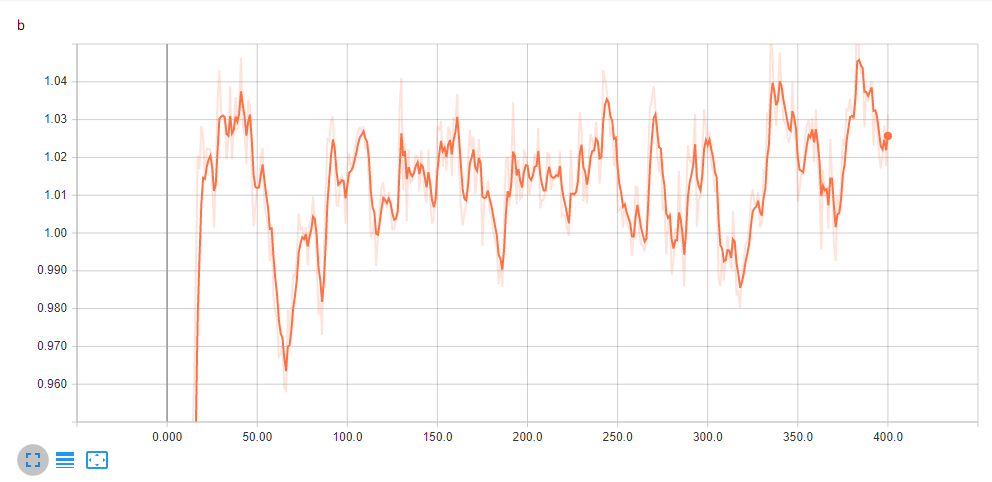

### Display m distribution:

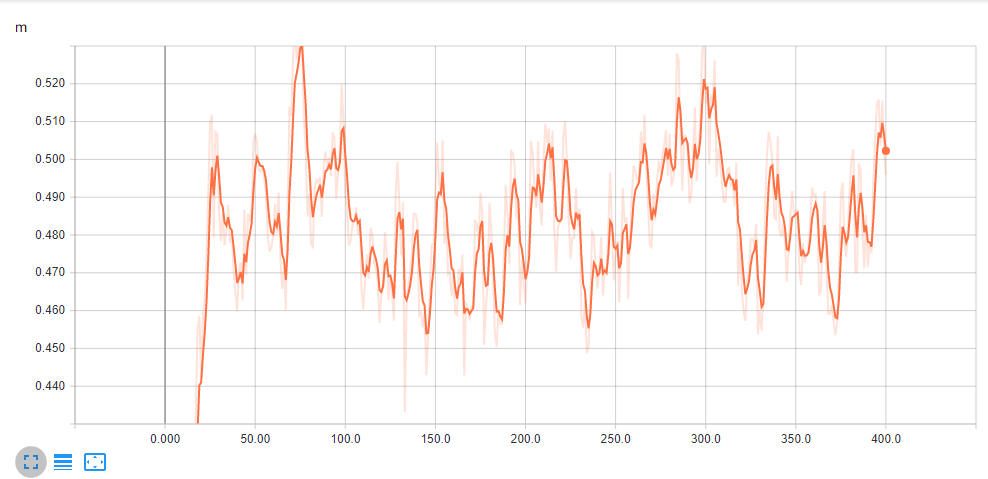

## Datasets and Iterators

In [23]:
# Generator function
def gen_func():
    x = 12
    while x < 20:
        yield x
        x += 2

In [24]:
# Step 1: Create a dataset/iterator from a range of values
ds1 = tf.data.Dataset.range(4)
iter1 = ds1.make_one_shot_iterator()

# Step 2: Create a dataset/iterator from two tensors
t1 = tf.constant([4, 5])
t2 = tf.constant([6, 7])
ds2 = tf.data.Dataset.from_tensors([t1, t2])
iter2 = ds2.make_one_shot_iterator()

# Step 3: Create a dataset/iterator from rows of a tensor
t3 = tf.constant([[8], [9], [10], [11]])
ds3 = tf.data.Dataset.from_tensor_slices(t3)
iter3 = ds3.make_one_shot_iterator()

# Step 4: Create a dataset/iterator from a generator function
ds4 = tf.data.Dataset.from_generator(gen_func, output_types=tf.int64)
iter4 = ds4.make_one_shot_iterator()

# Step 5: Print the elements of each dataset
with tf.Session() as sess:
    
    for _ in range(4):
        print(sess.run(iter1.get_next()))
        
    print(sess.run(iter2.get_next()))        

    for _ in range(4):
        print(sess.run(iter3.get_next()))    
        
    for _ in range(4):
        print(sess.run(iter4.get_next()))    

0
1
2
3
[[4 5]
 [6 7]]
[8]
[9]
[10]
[11]
12
14
16
18


## Dealing with MNIST Dataset

In [31]:
import matplotlib.pyplot as plt
#import tensorflow as tf

# Step 1: Create a TFRecordDataset and iterator
dset = tf.data.TFRecordDataset('C:/Users/nisht/Anaconda3_n/envs/LL/Accelerating_TensorFlow/images/mnist_test.tfrecords')
iter = dset.make_one_shot_iterator()

# Step 2: Create a dictionary that describes the examples
feature_dict = {'images': tf.FixedLenFeature([], tf.string),
                'labels': tf.FixedLenFeature([], tf.int64)}

In [32]:
dset

<TFRecordDataset shapes: (), types: tf.string>

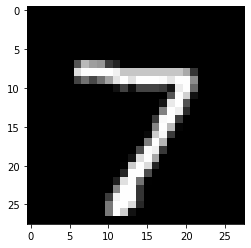

In [33]:
# Step 3: Parse the first example
with tf.Session() as sess:
    example = sess.run(iter.get_next())
    mnist = tf.parse_single_example(example, feature_dict)
    
# Step 4: Convert the data in the first image to a 28-by-28 array
    pixels = tf.decode_raw(mnist['images'], tf.uint8)
    pixel_matrix = pixels.eval().reshape((28, 28))
    
# Step 5: Display the image
    plt.imshow(pixel_matrix, cmap='gray')
    plt.show

## Implementing Linear egression on MNIST using TF Estimators

In [34]:
''' Demonstrate how estimators can be used for regression '''

# Define constants
N = 1000
num_steps = 800

# Step 1: Generate input points
x_train = np.random.normal(size=N)
m = np.random.normal(loc=0.5, scale=0.2, size=N)
b = np.random.normal(loc=1.0, scale=0.2, size=N)
y_train = m * x_train + b

# Step 2: Create a feature column
x_col = tf.feature_column.numeric_column('x_coords')

# Step 3: Create a LinearRegressor
estimator = tf.estimator.LinearRegressor([x_col])

# Step 4: Train the estimator with the generated data
train_input = tf.estimator.inputs.numpy_input_fn(
        x={'x_coords': x_train}, y=y_train,
        shuffle=True, num_epochs=num_steps)
estimator.train(train_input)
        

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\nisht\\AppData\\Local\\Temp\\tmpl82h804a', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001AE6820CF98>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\nisht\App

In [35]:
# Step 5: Predict the y-values when x equals 1.0 and 2.0
predict_input = tf.estimator.inputs.numpy_input_fn(
        x={'x_coords': np.array([1.0, 2.0], dtype=np.float32)},
        num_epochs=1, shuffle=False)
results = estimator.predict(predict_input)

for value in results:
    print(value['predictions'])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\nisht\AppData\Local\Temp\tmpl82h804a\model.ckpt-6250
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
[1.4858601]
[1.9702799]


## DNN Classifier on MNIST using Tensor Estimator

In [53]:
# Define constants
image_dim = 28
num_labels = 10
#batch_size = 80
#num_steps = 8000
hidden_layers = [128, 32]

# Step 1: Create a function to parse MNIST data
def parser(record):
    features = tf.parse_single_example(record,
            features = {
                    'images': tf.FixedLenFeature([], tf.string),
                    'labels': tf.FixedLenFeature([], tf.int64),
                    })
    image = tf.decode_raw(features['images'], tf.uint8)
    image.set_shape([image_dim * image_dim])
    image = tf.cast(image, tf.float32) * (1.0/255) - 0.5
    label = features['labels']
    return image, label

# Step 2: Describe input data with a feature column
column = tf.feature_column.numeric_column('pixels', shape=[image_dim * image_dim])

In [54]:
# Step 3: Create a DNNClassifier with the feature column
dnn_class = tf.estimator.DNNClassifier(hidden_layers, [column],
        model_dir='dnn_output', n_classes=num_labels)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'dnn_output', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001AE6BC32F98>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [39]:
# Step 4: Train the estimator
def train_func():
    dataset = tf.data.TFRecordDataset('../images/mnist_train.tfrecords')
    dataset = dataset.map(parser).repeat().batch(batch_size)
    image, label = dataset.make_one_shot_iterator().get_next()
    return {'pixels': image}, label
dnn_class.train(train_func, steps=num_steps)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into dnn_output\model.ckpt.
INFO:tensorflow:loss = 207.07034, step = 1
INFO:tensorflow:global_step/sec: 95.4433
INFO:tensorflow:loss = 60.776043, step = 101 (1.053 sec)
INFO:tensorflow:global_step/sec: 183.641
INFO:tensorflow:loss = 38.944504, step = 201 (0.542 sec)
INFO:tensorflow:global_step/sec: 166.557
INFO:tensorflow:loss = 27.634481, step = 301 (0.600 sec)
INFO:tensorflow:global_step/sec: 190.623
INFO:tensorflow:loss = 34.902332, step = 401 (0.525 sec)
INFO:tensorflow:global_step/sec: 186.025
INFO:tensorflow:loss = 33.898277, step = 501 (0.538 sec)
INFO:tensorflow:global_step/sec: 189.542
INFO:tensorflow:loss = 24.749817, step = 601 (0.529 sec)
INFO:tensorflow:global_step/sec: 174.075
INFO:tensorflow:loss =

In [40]:
# Step 5: Test the estimator
def test_func():
    dataset = tf.data.TFRecordDataset('../images/mnist_test.tfrecords')    
    dataset = dataset.map(parser).batch(batch_size)
    image, label = dataset.make_one_shot_iterator().get_next()
    return {'pixels': image}, label
metrics = dnn_class.evaluate(test_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-05-24-10:02:51
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from dnn_output\model.ckpt-8000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-05-24-10:02:52
INFO:tensorflow:Saving dict for global step 8000: accuracy = 0.9591, average_loss = 0.13177508, global_step = 8000, loss = 10.5420065


In [41]:
# Display metrics
for key, value in metrics.items():
    print(key, ': ', value)

accuracy :  0.9591
average_loss :  0.13177508
loss :  10.5420065
global_step :  8000
